# Explore Weather

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

In [8]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# import data
weather1 = pd.read_csv("../data/weather/weather_data1.csv")
weather2 = pd.read_csv("../data/weather/weather_data2.csv")

In [10]:
# TODO: concatenate your data files together and save to a new csv file ("../data/weather/weather_data.csv")
weather = weather = pd.concat([weather1, weather2], ignore_index=True)
weather.to_csv("../data/weather/weather_data.csv", index=False)

In [11]:
# TODO: view first 5 rows of your data
print(weather.head())

   year  rain_max   temp_avg   temp_max   temp_min    hum_max    hum_min  \
0  2006  6.670968  21.803087  27.190323  18.654839  97.129032  57.806452   
1  2007  1.866250  23.040999  27.649375  18.753125  87.837500  48.493750   
2  2008  3.777049  20.682400  27.000000  16.216393  96.136612  51.415301   
3  2009  3.380220  21.023802  27.769231  16.410440  96.054945  49.329670   
4  2010  2.183516  21.444293  28.580769  16.156044  95.247253  44.648352   

   wind_max  wind_avg   subdivision  
0  9.706452  2.075207  Minas Gerais  
1  8.749375  2.069605  Minas Gerais  
2  8.865027  1.584408  Minas Gerais  
3  9.114286  1.611746  Minas Gerais  
4  9.109341  1.455907  Minas Gerais  


In [12]:
# TODO: describe your numeric columns
print(weather.describe())

              year   rain_max   temp_avg   temp_max   temp_min    hum_max  \
count    18.000000  18.000000  18.000000  18.000000  18.000000  18.000000   
mean   2014.500000   3.175087  21.285831  28.198312  16.458525  96.502990   
std       5.338539   1.190658   0.549483   0.564714   0.891070   2.345644   
min    2006.000000   1.617582  20.682400  27.000000  15.268681  87.837500   
25%    2010.250000   2.342250  20.975602  27.811486  16.041470  96.079483   
50%    2014.500000   2.978022  21.126061  28.406027  16.319722  97.089241   
75%    2018.750000   3.718815  21.434377  28.614973  16.459066  97.553044   
max    2023.000000   6.670968  23.040999  29.010989  18.753125  98.500000   

         hum_min   wind_max   wind_avg  
count  18.000000  18.000000  18.000000  
mean   48.528039   8.469412   1.286295  
std     3.010135   0.611327   0.399773  
min    44.648352   7.484426   0.812202  
25%    47.154325   7.906319   0.911424  
50%    48.450172   8.489286   1.216155  
75%    49.310440   

In [13]:
# TODO: display the null values in your dataframe
print(weather.isnull().sum())

year           0
rain_max       0
temp_avg       0
temp_max       0
temp_min       0
hum_max        0
hum_min        0
wind_max       0
wind_avg       0
subdivision    0
dtype: int64


In [14]:
# TODO: BEGIN YOUR EDA!

In [18]:
# Check structure
print(weather.shape)
print(weather.columns)
print(weather.dtypes)


(18, 10)
Index(['year', 'rain_max', 'temp_avg', 'temp_max', 'temp_min', 'hum_max',
       'hum_min', 'wind_max', 'wind_avg', 'subdivision'],
      dtype='object')
year             int64
rain_max       float64
temp_avg       float64
temp_max       float64
temp_min       float64
hum_max        float64
hum_min        float64
wind_max       float64
wind_avg       float64
subdivision     object
dtype: object


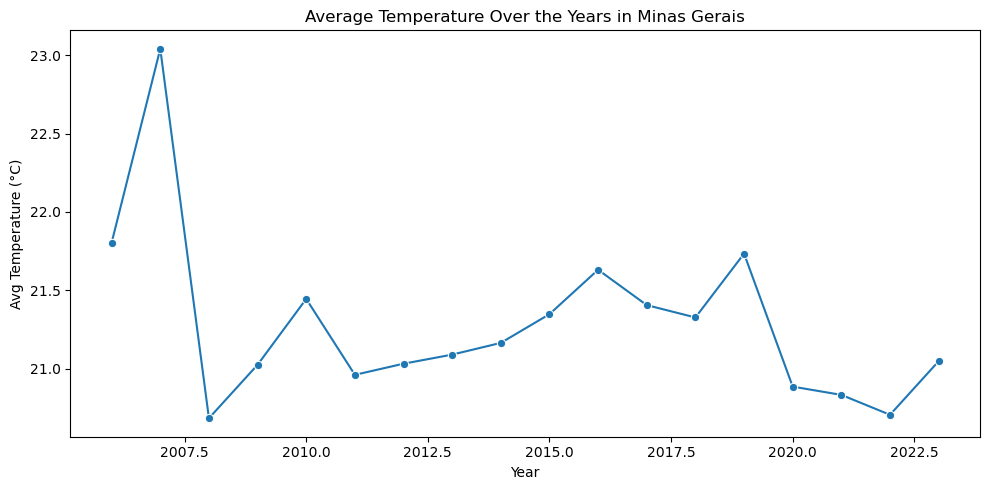

In [16]:
# Univariate Plot: Average Temperature Over the Years

plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='temp_avg', data=weather, marker='o')
plt.title("Average Temperature Over the Years in Minas Gerais")
plt.ylabel("Avg Temperature (°C)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

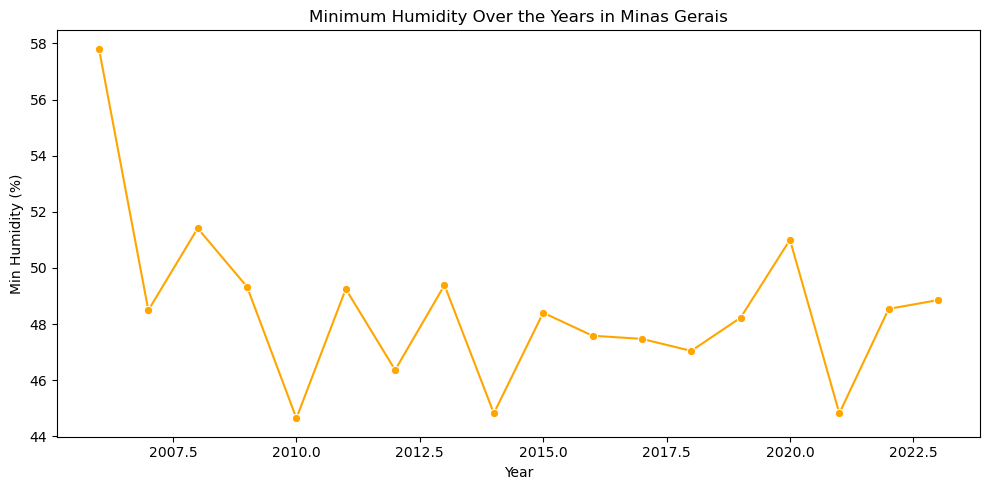

In [17]:
# Univariate Plot: Minimum Humidity Over the Years

plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='hum_min', data=weather, marker='o', color='orange')
plt.title("Minimum Humidity Over the Years in Minas Gerais")
plt.ylabel("Min Humidity (%)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


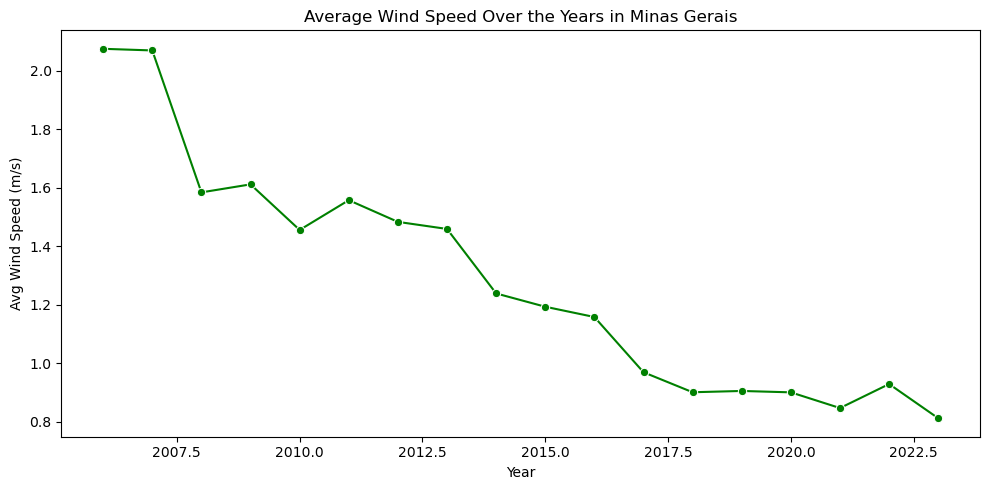

In [19]:
# Univariate Plot: Average Wind Speed Over the Years

plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='wind_avg', data=weather, marker='o', color='green')
plt.title("Average Wind Speed Over the Years in Minas Gerais")
plt.ylabel("Avg Wind Speed (m/s)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


In [21]:
# Year with the highest max rainfall

# Find the highest value in the rain_max column
highest_rain = weather['rain_max'].max()

# Find the row where rain_max is equal to the highest value
row = weather[weather['rain_max'] == highest_rain]

# Get the year from that row
year = row['year'].values[0]

# Print the result
print("The year with the highest maximum rainfall was", int(year), "with", highest_rain, "mm.")



The year with the highest maximum rainfall was 2006 with 6.670967741935484 mm.


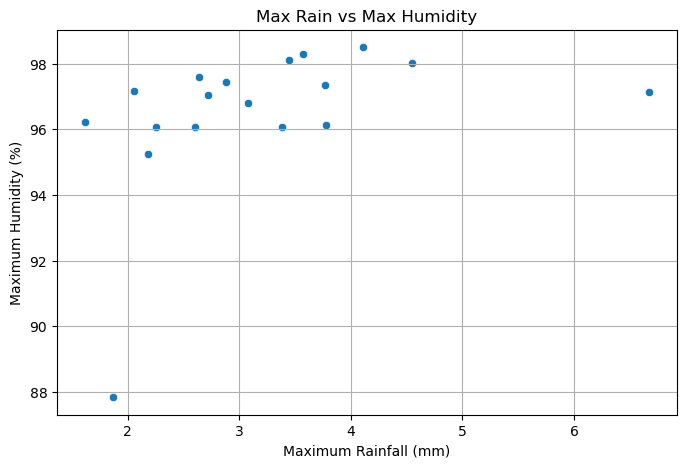

Pearson correlation between max rain and max humidity: 0.406


In [ ]:
# Bivariate Analysis

# Max Rain vs. Max Humidity
# Scatter plot: max rainfall vs max humidity

plt.figure(figsize=(8, 5))
sns.scatterplot(data=weather, x='rain_max', y='hum_max')
plt.title('Max Rain vs Max Humidity')
plt.xlabel('Maximum Rainfall (mm)')
plt.ylabel('Maximum Humidity (%)')
plt.grid(True)
plt.show()

# Pearson correlation
rain_humidity_corr = weather['rain_max'].corr(weather['hum_max'])
print(f"Pearson correlation between max rain and max humidity: {rain_humidity_corr:.3f}")



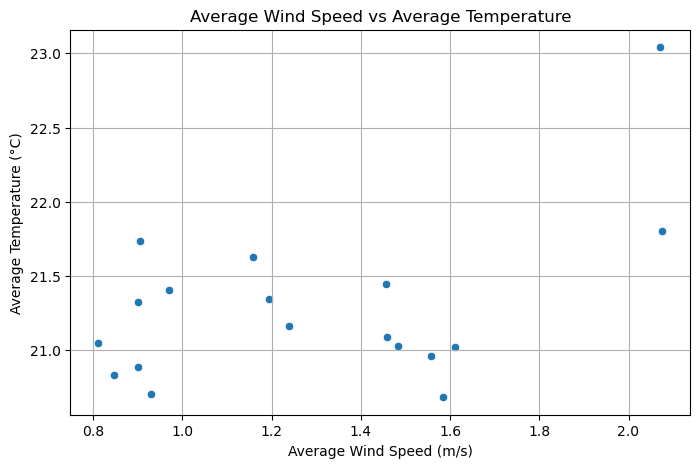

Pearson correlation between average wind speed and average temperature: 0.477


In [25]:
# Average Wind Speed vs. Average Temperature

# Scatter plot: average wind speed vs average temperature
plt.figure(figsize=(8, 5))
sns.scatterplot(data=weather, x='wind_avg', y='temp_avg')
plt.title('Average Wind Speed vs Average Temperature')
plt.xlabel('Average Wind Speed (m/s)')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()

# Pearson correlation
wind_temp_corr = weather['wind_avg'].corr(weather['temp_avg'])
print(f"Pearson correlation between average wind speed and average temperature: {wind_temp_corr:.3f}")


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context.

How is average temperature changing across the years for Minas Gerais? Is this increasing or decreasing?

Ans: The average temperature in Minas Gerais does not show a consistent increasing or decreasing trend over the years (between 2006 and 2023). While there is a sharp peak in 2007 (about 23°C) and a notable dip in 2008 to approximately 20.7°C, the values from 2008 to 2023 fluctuates between 20.7°C and 21.8°C.

Besides the peaking of the temperature observed in 2007, the trend is relatively stable, with no significant increase or decrease in average temperature over the observed years from 2008 to 2023.

How is minimum humidity changing across the years for Minas Gerais? Is this increasing or decreasing?

Ans: Minimum humidity in Minas Gerais shows no consistent upward or downward trend over the years. The values varied significantly from year to year without a clear pattern. The lowest minimum humidity occurred in 2010, followed closely by 2014 and 2021 (around 44.5% - 45%), while the highest was recorded in 2006 (about 58%), indicating intermittent dry and humid years. There was a relatively stable period from 2015 to 2019, during which the minimum humidity remained in the 47%-48.5% range.

How is average wind speed changing across the years for Minas Gerais? Is this increasing or decreasing?

Ans: 
Average wind speed in Minas Gerais shows a clear and consistent downward trend from 2006 to 2023. The highest values were recorded in 2006 and 2007 (above 2.0 m/s). However, from 2008 onward, the wind speed gradually declined, falling below 1.0 m/s after 2016 and remaining low through 2023, with some years reaching as low as 0.85 m/s.

This trend suggests a steady reduction in wind activity in the region across the years, with no significant upward recovery observed during the period. The data indicates that Minas Gerais has experienced progressively calmer wind conditions over time.

Which year had the highest maximum record rainfall?

Ans: The year with the highest maximum rainfall was 2006 with 6.670967741935484 mm.


What is the relationship between max rain and max humidity? How *strong* is this relationship? Use pearson's correlation coefficient.

Ans: 
The scatter plot shows that most data points are clustered at higher humidity levels (96%–99%) with varying rainfall amounts, with a few outliers.

The Pearson correlation coefficient is 0.406, which indicates a weak to moderate positive linear relationship. This means that, as maximum humidity increases, maximum rainfall tends to increase as well, but the relationship is not very strong.

What is the relationship between average wind speed and average temperature? How *strong* is this relationship? Use pearson's correlation coefficient.

Ans: 
The scatter plot of average wind speed versus average temperature suggests a moderate positive relationship, supported by a Pearson correlation coefficient of 0.477. This indicates that as average wind speed increases, average temperature tends to increase as well, though the relationship is not very strong. While the plot shows some variability, the correlation value confirms a modest upward trend between the two variables. 